1. When and Who created the dataset?
2. How did you get acess to the dataset?
3. List out the attributes (columns) of a dataset.
– Guess some probable question that dataset could answer.
– Assess the basic fitness of the dataset.

1 Ans: SHIVAM AGGRAWAL created this dataset in 2017.

2 Ans: I get the access to the dataset from the site named kaggle.com.


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# Importing libraries for data manipulation and analysis
import pandas as pd  # Pandas is used for handling structured data
import matplotlib.pyplot as plt  # Matplotlib is a plotting library
import seaborn as sns  # Seaborn provides high-level interface for statistical plotting

# Train Test Split
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

# Models
from sklearn.ensemble import RandomForestRegressor  # Random Forest Regressor for regression tasks
from sklearn.ensemble import GradientBoostingRegressor  # Gradient Boosting Regressor for regression tasks

# Metrics
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for regression tasks

# Cross Validation
from sklearn.model_selection import cross_val_score  # Cross-validation for model evaluation
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning


In [74]:
path="/content/drive/MyDrive/concepts of AI/gld_price_data.csv"
dataframe=pd.read_csv(path)
dataframe

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [75]:
df=dataframe.copy()
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Displaying first five row of the dataset.

In [76]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Displaying last five row of the dataset.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Displaying memory usage and all columns with their datatype.

In [78]:
shape=df.shape
print("The shape of dataset:",shape)

The shape of dataset: (2290, 6)


Load and Check the dataset: After loading the data, it is a good practise to run some checks on
it. You must perform the following:

(a) Data Cleaning and find the summary statistics of the data.

In [79]:
duplicates=df.duplicated().sum()
print("The number of duplicate data is :",duplicates)

The number of duplicate data is : 0


In [80]:
df.drop_duplicates(inplace =True)

In [81]:
missing_value_check = df.isnull().sum()
print(missing_value_check)

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [82]:
#check unique values
for column in df.columns:
  unique_values = df[column].unique()
  print(f'Uniques values in {column}: {unique_values}')

Uniques values in Date: ['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']
Uniques values in SPX: [1447.160034 1411.630005 1416.180054 ... 2723.070068 2730.129883
 2725.780029]
Uniques values in GLD: [ 84.860001  85.57      85.129997 ... 124.330002 124.489998 122.5438  ]
Uniques values in USO: [78.470001 78.370003 77.309998 ... 14.37     14.41     14.4058  ]
Uniques values in SLV: [15.18   15.285  15.167  ... 15.65   15.28   15.4542]
Uniques values in EUR/USD: [1.471692 1.474491 1.475492 ... 1.191753 1.193118 1.182033]


In [83]:

categorical_value = df.select_dtypes(include='object')
unique_values={}
for i in categorical_value:
  unique_values[i] = categorical_value[i].unique()
print("Unique value in categorical column in dataset: \n")
print(unique_values)


Unique value in categorical column in dataset: 

{'Date': array(['1/2/2008', '1/3/2008', '1/4/2008', ..., '5/10/2018', '5/14/2018',
       '5/16/2018'], dtype=object)}


In [84]:
print("The count, mean, std, min, max is given below:\n")
numeric = df.select_dtypes(include="number")
print(numeric.describe())

The count, mean, std, min, max is given below:

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [85]:

minimum = numeric.min()
maximum = numeric.max()
range = maximum - minimum
print("Range of each column in dataset:\n")
print(range)


Range of each column in dataset:

SPX        2196.340088
GLD         114.589996
USO         109.520003
SLV          38.409998
EUR/USD       0.559751
dtype: float64


In [86]:
median_value = numeric.median()
print("Median value of each column in dataset:\n")
print(median_value)


Median value of each column in dataset:

SPX        1551.434998
GLD         120.580002
USO          33.869999
SLV          17.268500
EUR/USD       1.303297
dtype: float64


In [87]:
variance=numeric.var()
print("Variance of each column in dataset:\n")
print(variance)

Variance of each column in dataset:

SPX        269476.791172
GLD           542.114189
USO           381.167717
SLV            50.304498
EUR/USD         0.017305
dtype: float64


Univariate Analysis

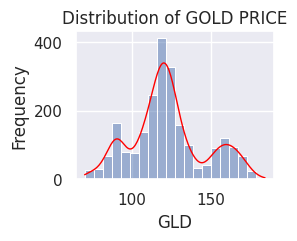

In [139]:

plt.subplot(2,2,2)
sns.histplot(df['GLD'], kde = True, bins = 20,line_kws = {'linewidth':'1'}).lines[0].set_color('red')
plt.title("Distribution of GOLD PRICE")
plt.xlabel('GLD')
plt.ylabel('Frequency')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.savefig("histogram_plot.png")
plt.show()

I've examined the skewness of gold price. In this histogram, the line curve is the skewness of the variables. There is a symmetrical distribution as the line curve is forming like a bell curve and it has perfectly identical two halves.

Bivariate Analysis

<ipython-input-89-77298691e78f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat_map= df.corr()


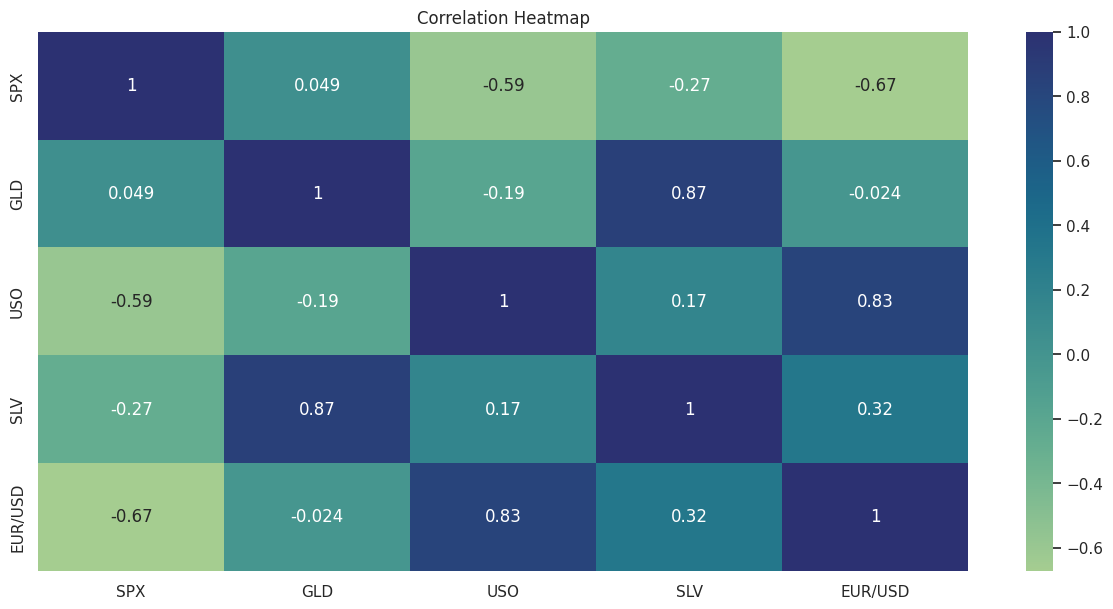

In [89]:
heat_map= df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(heat_map,annot=True,cmap='crest')
plt.title("Correlation Heatmap")
plt.savefig('Bivariate_correlation_heatmap.png')
plt.show()

In the above heatmap, the colors signify the degree and the nature of correlation: darker the colour or darker the shades indicate a string positive correlation, whereas the lighter colour signify the stronger negative correlation. The number varies from -1 to 1. 1 means a perfect correlation whereas a -1 means a bad relation.For example when we see the correlation between SPX and EUR/USD it tends to be bad as it is -0.67 and appears to be in lighter shade.

In [93]:
df2=df.copy()
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
df2['date_encoded'] = label_encoder.fit_transform(df2['Date'])
# Display the resulting DataFrame after encoding
print(df2.head())

       Date          SPX        GLD        USO     SLV   EUR/USD  date_encoded
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692            70
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491           152
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492           174
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299           198
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099           206


In [98]:

df2.drop(columns=['Date'], inplace=True)
df2

,SPX,GLD,USO,SLV,EUR/USD,date_encoded
0,1447.160034,84.860001,78.470001,15.1800,1.471692,70
1,1447.160034,85.570000,78.370003,15.2850,1.474491,152
2,1411.630005,85.129997,77.309998,15.1670,1.475492,174
3,1416.180054,84.769997,75.500000,15.0530,1.468299,198
4,1390.189941,86.779999,76.059998,15.5900,1.557099,206
...,...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789,1615
2286,2697.790039,124.330002,14.370000,15.5300,1.184722,1621
2287,2723.070068,125.180000,14.410000,15.7400,1.191753,1459
2288,2730.129883,124.489998,14.380000,15.5600,1.193118,1485


In [123]:
X = df2.drop(columns=['GLD'])  # Features
Y= df2['GLD']  # Target variable
X

,SPX,USO,SLV,EUR/USD,date_encoded
0,1447.160034,78.470001,15.1800,1.471692,70
1,1447.160034,78.370003,15.2850,1.474491,152
2,1411.630005,77.309998,15.1670,1.475492,174
3,1416.180054,75.500000,15.0530,1.468299,198
4,1390.189941,76.059998,15.5900,1.557099,206
...,...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789,1615
2286,2697.790039,14.370000,15.5300,1.184722,1621
2287,2723.070068,14.410000,15.7400,1.191753,1459
2288,2730.129883,14.380000,15.5600,1.193118,1485


3.2.2 Build Primary Model: [5]
Once you have assembled your dataset and gained insights into the key characteristics of your data, it’s time
to Build; Train; and Evaluate your model. For this task you must do the following:
1. Split the Dataset into Train and Test set.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (1832, 5)
The shape of X_test is        (458, 5)
The shape of y_train is       (1832,)
The shape of y_test is        (458,)


Built at least two machine learning model for Regression Task.

Random Forest Regressor

In [145]:

# Initialize Random Forest Regressor model
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_rf)

# Print the mean squared error
print("Mean Squared Error after random forest regressor:", mse)

Mean Squared Error after random forest regressor: 3.4564326664483453


In [146]:
# Calculate R-squared for the training data
train_r2_rf = rf_reg.score(X_train, y_train)

# Calculate R-squared for the test data
test_r2_rf = r2_score(y_test, y_pred_rf)

print("Train R-squared (Random Forest):", train_r2_rf)
print("Test R-squared (Random Forest):", test_r2_rf)


Train R-squared (Random Forest): 0.9987849721679869
Test R-squared (Random Forest): 0.9936960909645046


Gradient Boosting regressor

In [129]:
# Import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor()

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_gb)

# Print the mean squared error
print("Mean Squared Error after gradient boosting:", mse)


Mean Squared Error after gradient boosting: 10.233554117299388


In [130]:

# Calculate R-squared for the training data
train_r2_gb = gb_reg.score(X_train, y_train)

# Calculate R-squared for the test data
test_r2_gb = r2_score(y_test, y_pred_gb)

print("Train R-squared (Gradient Boosting):", train_r2_gb)
print("Test R-squared (Gradient Boosting):", test_r2_gb)


Train R-squared (Gradient Boosting): 0.9887024201799931
Test R-squared (Gradient Boosting): 0.9813358452223045


The Random Forest Regressor and Gradient Boosting Regressor are commonly used for regression tasks. The Random Forest Regressor constructs an ensemble of decision trees, each trained on a random subset of the data. By combining predictions from multiple trees, it reduces overfitting and improves generalization. In our analysis, it achieved a high R-squared value of 0.99 on the training data and 0.99 on the test data.

In contrast, the Gradient Boosting Regressor builds trees sequentially to correct errors made by previous ones, resulting in a strong predictive model. It achieved an R-squared value of 0.988 on the training data and 0.981 on the test data, indicating good generalization ability. Overall, both models offer good solution for gold price prediction.








Hyper-parameter Optimization with Cross-Validation

Random Forest Regressor

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=0)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [133]:
# Get the best estimator from the grid search
best_rf_reg = grid_search.best_estimator_

# Predict on the test data using the best estimator
y_pred_best = best_rf_reg.predict(X_test)

# Calculate the mean squared error
mse_best = mean_squared_error(y_test, y_pred_best)

print("MSE after hyperparameter tuning:", mse_best)


MSE after hyperparameter tuning: 3.205026184073534


Gradient Boosting regressor

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for hyperparameter tuning
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=0)

# Perform hyperparameter tuning using GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_reg, param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best hyperparameters for Gradient Boosting Regressor:", best_params_gb)

# Get the best model
best_gb_reg = grid_search_gb.best_estimator_


Best hyperparameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


In [134]:
from sklearn.metrics import mean_squared_error

# Predict on the test data using the best Gradient Boosting Regressor model
y_pred_gb_tuned = best_gb_reg.predict(X_test)

# Calculate the mean squared error
mse_gb_tuned = mean_squared_error(y_test, y_pred_gb_tuned)
print("Mean Squared Error (after hyperparameter tuning):", mse_gb_tuned)



Mean Squared Error (after hyperparameter tuning): 4.237963700449483


Conclusion:

From the above evaluation we can observe that :

Random Forest Regressor:

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

MSE after hyperparameter tuning: 3.205026184073534

Gradient Forest Regressor:

Best hyperparameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}


Mean Squared Error (after hyperparameter tuning): 4.237963700449483

Feature Selection

 Random Forest regressor

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=0)

# Instantiate SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest to the training data and transform it to select the top five features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_rfr = X_train.columns[selected_indices]

print("Selected Features after SelectKBest with ANOVA F-test:")
print(selected_features_rfr)


Selected Features after SelectKBest with ANOVA F-test:
Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'date_encoded'], dtype='object')


Gradient Boosting Regressor

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(random_state=0)

# Instantiate SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)

# Fit SelectKBest to the training data and transform it to select the top five features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_gbr = X_train.columns[selected_indices]

print("Selected Features after SelectKBest with ANOVA F-test:")
print(selected_features_gbr)


Selected Features after SelectKBest with ANOVA F-test:
Index(['SPX', 'USO', 'SLV', 'EUR/USD', 'date_encoded'], dtype='object')


Final Model

 Random forest regressor

In [144]:


# Best hyperparameters obtained from the hyperparameter tuning process
best_params = {
    'max_depth': None,
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 150,
    'random_state': 0
}

# Instantiate the Random Forest regressor with best hyperparameters
rf_reg_best = RandomForestRegressor(**best_params)

# Convert selected features into a DataFrame with column names
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features_rfr)

# Train the Random Forest Regressor using only the selected features
rf_reg_best.fit(X_train_selected_df, y_train)

# Convert test data to selected features DataFrame
X_test_selected_df = X_test[selected_features_rfr]

# Predict on the test set using the selected features
y_pred_rf_best = rf_reg_best.predict(X_test_selected_df)

# Calculate mean squared error
mse_best = mean_squared_error(y_test, y_pred_rf_best)


# Print the mean squared error
print("Mean Squared Error of random forest regression model with best hyperparameters and feature selection is:", mse_best)


Mean Squared Error of random forest regression model with best hyperparameters and feature selection is: 3.4545907206040933


Gradient Boosting regressor

In [140]:
# Define the best hyperparameters
best_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 50
}

# Initialize the Gradient Boosting Regressor with the best hyperparameters
gb_reg_best = GradientBoostingRegressor(**best_params)

# Train the Gradient Boosting Regressor using only the selected features
gb_reg_best.fit(X_train_selected, y_train)

# Convert test data to selected features array
X_test_selected_arr = X_test[['SPX', 'USO', 'SLV', 'EUR/USD', 'date_encoded']].values

# Predict on the test set using the selected features
y_pred_gb_best = gb_reg_best.predict(X_test_selected_arr)

# Calculate mean squared error
mse_best = mean_squared_error(y_test, y_pred_gb_best)

# Print the mean squared error
print("Mean Squared Error of Gradient Boosting regression model with best hyperparameters and feature selection is:", mse_best)



Mean Squared Error of Gradient Boosting regression model with best hyperparameters and feature selection is: 4.2735216427783005


In conclusion, when evaluating the performance of the random forest regression and gradient boosting regression models with the best hyperparameters and feature selection, the random forest model demonstrates superior performance with an MSE of 3.45 compared to the gradient boosting model's MSE of 4.27. This indicates that, on average, the squared difference between the actual and predicted values of the target variable is lower for the random forest model, suggesting a closer fit to the data. Therefore, based on MSE alone, the random forest regression model appears to be the more effective choice for this particular regression task